# Diamond Price Prediction Using Random Forest Regressor

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

In [2]:
# Reading the Dataset
df = pd.read_csv('diamonds.csv')

In [3]:
# Printing the first 5 rows of the Dataset
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
# Printing the last 5 rows of the Dataset
df.tail()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [5]:
# Dropping the Unnamed Column
df = df.drop(['Unnamed: 0'], axis=1)

In [6]:
# Checking for Null Values
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [7]:
# Information of the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [8]:
# Duplicated Values in the Dataset
df.duplicated().sum()

146

In [9]:
# Dropping the Duplicate Values
df = df.drop_duplicates()

## Data Visualization

In [10]:
# Diamond Cuts Disrtibution
cut_types = df.cut.value_counts().sort_values().reset_index()

In [11]:
cut_types

,cut,count
0,Fair,1598
1,Good,4891
2,Very Good,12069
3,Premium,13748
4,Ideal,21488


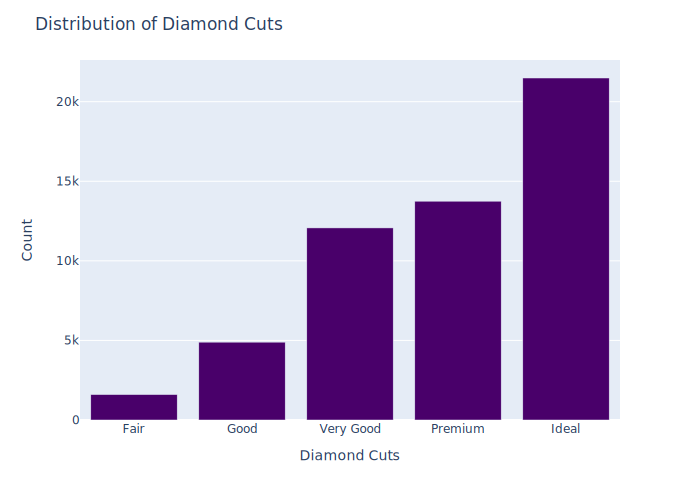

In [12]:
fig1 = px.bar(cut_types, x = 'cut', y = 'count',color_discrete_sequence=px.colors.sequential.RdPu_r)
fig1.update_layout(title = 'Distribution of Diamond Cuts', xaxis_title = 'Diamond Cuts', yaxis_title = 'Count ')
fig1.show('svg')

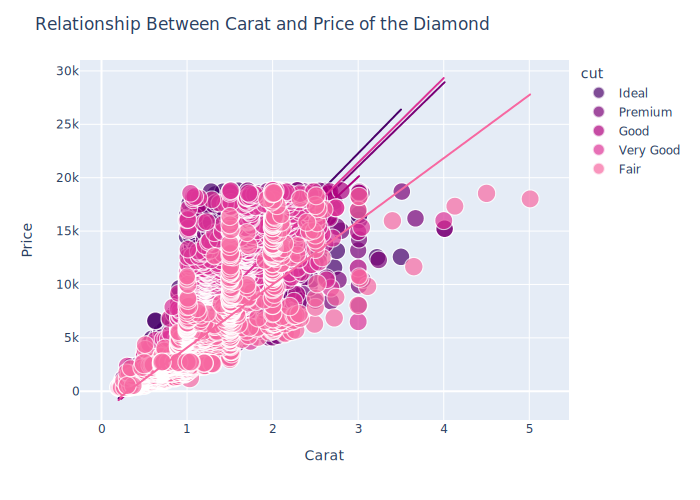

In [13]:
fig2 = px.scatter(df, 
                  x = 'carat', 
                  y = 'price', 
                  color = 'cut', 
                  size = 'depth', 
                  color_discrete_sequence=px.colors.sequential.RdPu_r, 
                  trendline='ols')
fig2.update_layout(title = 'Relationship Between Carat and Price of the Diamond', xaxis_title = 'Carat', yaxis_title = 'Price')
fig2.show('svg')

In [14]:
# Adding a Column Size
df['size'] = df['x'] * df['y'] * df['z']

In [15]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z,size
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250
...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,115.920000
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,118.110175
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,114.449728
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,140.766120


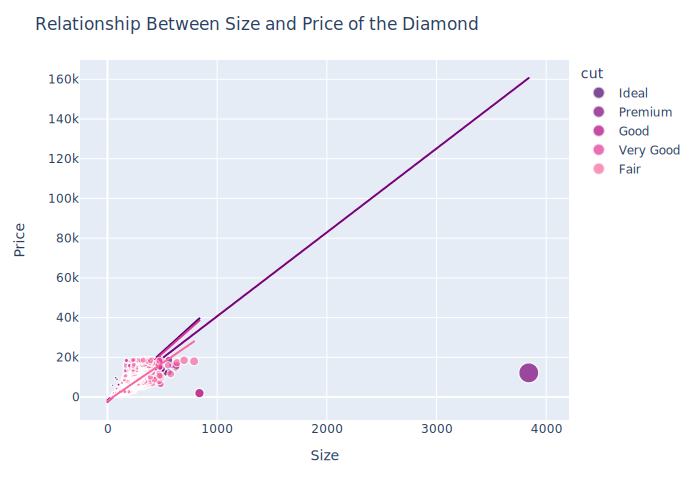

In [16]:
fig3 = px.scatter(df, 
                  x = 'size', 
                  y = 'price', 
                  color = 'cut', 
                  size = 'size',
                  trendline='ols',
                  color_discrete_sequence=px.colors.sequential.RdPu_r)
fig3.update_layout(title = 'Relationship Between Size and Price of the Diamond', xaxis_title = 'Size', yaxis_title = 'Price')
fig3.show('svg')

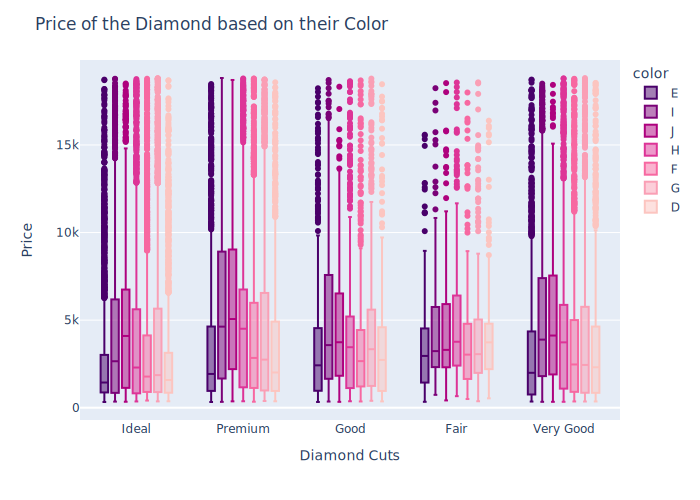

In [17]:
fig4 = px.box(df, x = 'cut', y = 'price', color = 'color', color_discrete_sequence=px.colors.sequential.RdPu_r)
fig4.update_layout(title = ' Price of the Diamond based on their Color', xaxis_title = 'Diamond Cuts', yaxis_title = 'Price')
fig4.show('svg')

In [18]:
clarity_dist = df.clarity.value_counts().sort_values().reset_index()

In [19]:
clarity_dist

,clarity,count
0,I1,740
1,IF,1784
2,VVS1,3647
3,VVS2,5056
4,VS1,8156
5,SI2,9150
6,VS2,12229
7,SI1,13032


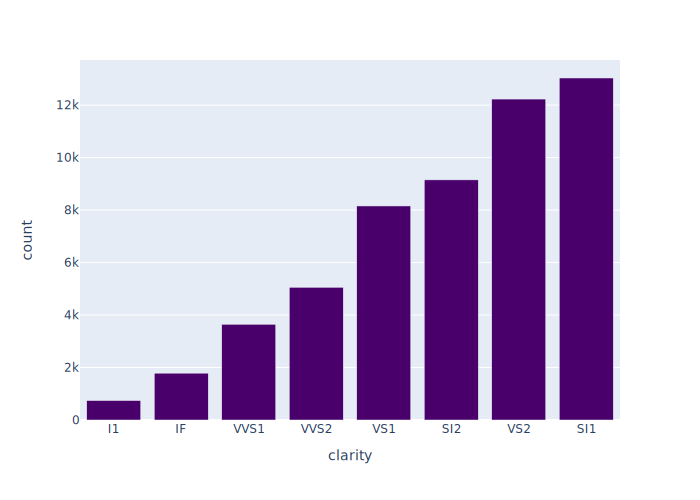

In [20]:
fig5 = px.bar(clarity_dist, x = 'clarity', y= 'count',color_discrete_sequence=px.colors.sequential.RdPu_r)
fig5.show('svg')

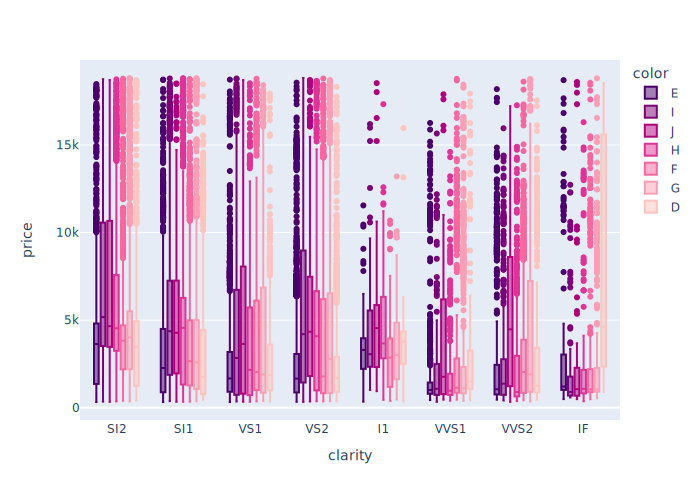

In [21]:
fig6 = px.box(df, x = 'clarity', y ='price', color = 'color', color_discrete_sequence=px.colors.sequential.RdPu_r)
fig6.show('svg')

## Data Pre-processing

In [22]:
# Changing the String Values to Numeric Values (Mapping)
df['cut'] = df['cut'].map({'Ideal':1,'Premium':2,'Very Good':3,'Good':4,'Fair':5})
df['color'] = df['color'].map({'G':1,'E':2,'F':3,'H':4,'D':5, 'I':6,'J':7})
df['clarity'] = df['clarity'].map({'SI1':1,'VS2':2,'SI2':3,'VS1':4,'VVS2':5, 'VVS1':6,'IF':7, 'I1':8})

In [23]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,size
0,0.23,1,2,3,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,2,2,1,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,4,2,4,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,2,6,2,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,4,7,3,63.3,58.0,335,4.34,4.35,2.75,51.917250


In [24]:
# Correlation of the Parameters in the Dataset
correlation = df.corr()

In [25]:
correlation

,carat,cut,color,clarity,depth,table,price,x,y,z,size
carat,1.000000,0.133376,0.189753,-0.155144,0.027861,0.181091,0.921548,0.975380,0.951908,0.953542,0.976227
cut,0.133376,1.000000,0.038003,-0.092627,0.217078,0.433700,0.052241,0.124303,0.120233,0.147940,0.116803
color,0.189753,0.038003,1.000000,-0.109881,0.027262,0.041952,0.090518,0.172658,0.168331,0.171544,0.185018
clarity,-0.155144,-0.092627,-0.109881,1.000000,-0.023675,-0.094048,-0.082926,-0.182737,-0.176525,-0.179596,-0.150724
depth,0.027861,0.217078,0.027262,-0.023675,1.000000,-0.297669,-0.011048,-0.025348,-0.029389,0.094757,0.008704
table,0.181091,0.433700,0.041952,-0.094048,-0.297669,1.000000,0.126566,0.194855,0.183231,0.150270,0.166813
price,0.921548,0.052241,0.090518,-0.082926,-0.011048,0.126566,1.000000,0.884504,0.865395,0.861208,0.902231
x,0.975380,0.124303,0.172658,-0.182737,-0.025348,0.194855,0.884504,1.000000,0.974592,0.970686,0.956595
y,0.951908,0.120233,0.168331,-0.176525,-0.029389,0.183231,0.865395,0.974592,1.000000,0.951844,0.975271
z,0.953542,0.147940,0.171544,-0.179596,0.094757,0.150270,0.861208,0.970686,0.951844,1.000000,0.950043


### Heatmap of the Dataset

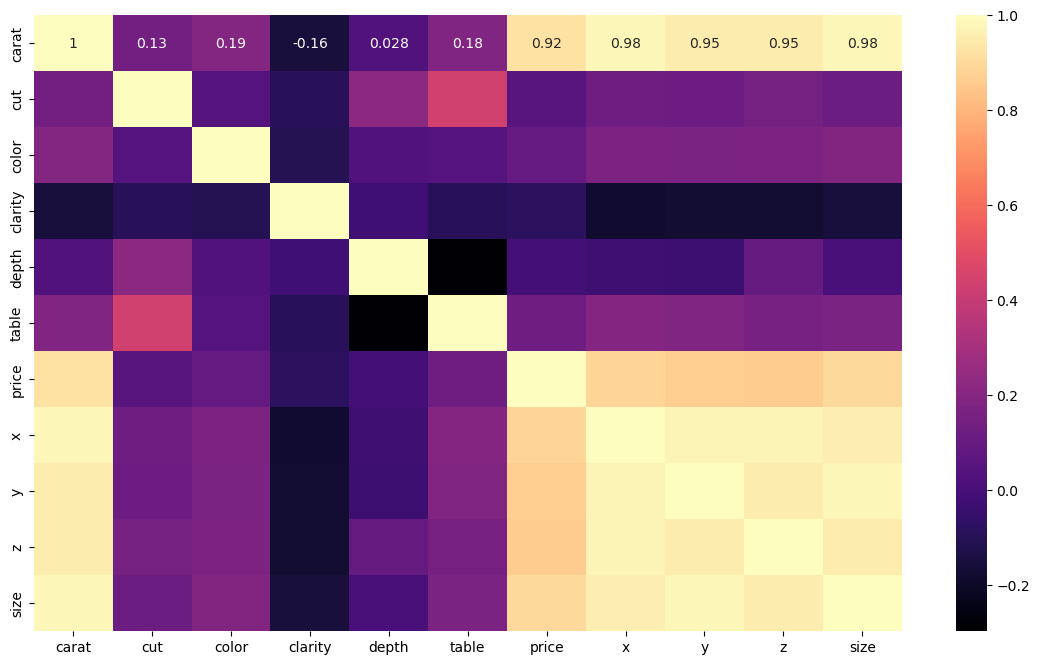

In [26]:
plt.figure(figsize=(14,8))
sns.heatmap(correlation, cmap='magma', annot =True)
plt.show()

In [27]:
correlation['price'].sort_values(ascending=False)

price      1.000000
carat      0.921548
size       0.902231
x          0.884504
y          0.865395
z          0.861208
table      0.126566
color      0.090518
cut        0.052241
depth     -0.011048
clarity   -0.082926
Name: price, dtype: float64

## Model Building

In [28]:
columns = ['carat','cut','size','color','depth']
X = df[columns]
Y = df['price']

In [29]:
X

,carat,cut,size,color,depth
0,0.23,1,38.202030,2,61.5
1,0.21,2,34.505856,2,59.8
2,0.23,4,38.076885,2,56.9
3,0.29,2,46.724580,6,62.4
4,0.31,4,51.917250,7,63.3
...,...,...,...,...,...
53935,0.72,1,115.920000,5,60.8
53936,0.72,4,118.110175,5,63.1
53937,0.70,3,114.449728,5,62.8
53938,0.86,2,140.766120,4,61.0


In [30]:
Y

0         326
1         326
2         327
3         334
4         335
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 53794, dtype: int64

In [31]:
# Splitting the Testing and Training Dataset
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.10, random_state=42)

In [32]:
print(X.shape,X_train.shape,X_test.shape)

(53794, 5) (48414, 5) (5380, 5)


In [33]:
# Changing the Values to an Array 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [34]:
X_train_scaled

array([[-0.48193049, -0.98206912, -0.46774588, -0.17370404,  0.59708448],
       [ 1.68681479, -0.08512908,  1.63093897,  0.37458827, -1.65054996],
       [ 0.21291023, -0.98206912,  0.24023116,  2.0194652 ,  0.59708448],
       ...,
       [-1.00832498, -0.98206912, -0.98273411,  2.0194652 ,  0.03517587],
       [ 0.21291023, -0.08512908,  0.14226679,  2.0194652 ,  0.73756163],
       [ 0.4445238 , -0.08512908,  0.37280905, -1.27028866,  0.66732306]])

In [35]:
X_test_scaled

array([[-0.16956856,  2.56999744, -0.20769395,  2.07075427,  2.13477298],
       [ 0.24424236,  0.79485477,  0.19689958, -0.72181052, -0.49286727],
       [-0.47448187, -0.98028789, -0.47072047, -1.28032348,  0.24826204],
       ...,
       [-0.62693852,  0.79485477, -0.64520747,  0.3952154 ,  0.04613586],
       [ 0.46203758,  1.68242611,  0.38540508,  0.95372835,  1.66314525],
       [ 1.65991131, -0.98028789,  1.65937694,  1.51224131,  0.24826204]])

In [36]:
# Fitting the Model with the Dataset
model = RandomForestRegressor(n_estimators=100, min_samples_split=2, criterion='squared_error')
model.fit(X_train_scaled, Y_train)

RandomForestRegressor()

In [37]:
# R2 Score of the Model 
accuracy= model.score(X_train_scaled, Y_train)*100
print('Accuracy of the Regressor Model :', accuracy)

Accuracy of the Regressor Model : 98.80732546581386


## Final Testing:

In [38]:
print('Diamond Price Prediction:')
carat = float(input('Carat Size:' ))
cut = int(input('Cut Type(Ideal=1,Premium=2,Very Good=3,Good=4,Fair=5):'))
size = float(input('Size :'))
color = int(input('Color (G:1,E:2,F:3,H:4,D:5,I:6,J:7)'))
depth = float(input('Depth:'))
features = np.array([[carat,cut,size,color,depth]])
print('Price of the Diamond:', model.predict(features))

Diamond Price Prediction:


Carat Size: 0.20
Cut Type(Ideal=1,Premium=2,Very Good=3,Good=4,Fair=5): 3
Size : 100
Color (G:1,E:2,F:3,H:4,D:5,I:6,J:7) 3
Depth: 60


Price of the Diamond: [7886.52]
